In [150]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA

In [45]:
df=pd.read_csv("train.csv")

In [46]:
df.shape

(1460, 81)

In [47]:
df.columns 

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [48]:
list(df.columns)

['Id',
 'MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF'

In [49]:
for x in df.columns:
    print(x)

Id
MSSubClass
MSZoning
LotFrontage
LotArea
Street
Alley
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
OverallQual
OverallCond
YearBuilt
YearRemodAdd
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
MasVnrArea
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinSF1
BsmtFinType2
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
Heating
HeatingQC
CentralAir
Electrical
1stFlrSF
2ndFlrSF
LowQualFinSF
GrLivArea
BsmtFullBath
BsmtHalfBath
FullBath
HalfBath
BedroomAbvGr
KitchenAbvGr
KitchenQual
TotRmsAbvGrd
Functional
Fireplaces
FireplaceQu
GarageType
GarageYrBlt
GarageFinish
GarageCars
GarageArea
GarageQual
GarageCond
PavedDrive
WoodDeckSF
OpenPorchSF
EnclosedPorch
3SsnPorch
ScreenPorch
PoolArea
PoolQC
Fence
MiscFeature
MiscVal
MoSold
YrSold
SaleType
SaleCondition
SalePrice


In [50]:
pd.set_option('display.max_rows',20000,'display.max_columns',100)

In [51]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [52]:
df.head(20)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,Gas

In [53]:
df.tail(20)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1440,1441,70,RL,79.0,11526,Pave,NaN,IR1,Bnk,AllPub,Inside,Mod,Crawfor,Norm,Norm,1Fam,2.5Fin,6,7,1922,1994,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,Ex,TA,No,Unf,0,Unf,0,588,588,GasA,Fa,Y,SBrkr,1423,748,384,2555,0,0,2,0,3,1,TA,11,Min1,1,Gd,Detchd,1993.0,Fin,2,672,TA,TA,Y,431,0,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,191000
1441,1442,120,RM,NaN,4426,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,TwnhsE,1Story,6,5,2004,2004,Gable,CompShg,VinylSd,VinylSd,BrkFace,147.0,Gd,TA,PConc,Gd,TA,Av,GLQ,697,Unf,0,151,848,GasA,Ex,Y,SBrkr,848,0,0,848,1,0,1,0,1,1,Gd,3,Typ,1,TA,Attchd,2004.0,RFn,2,420,TA,TA,Y,149,0,0,0,0,0,NaN,NaN,NaN,0,5,2008,WD,Normal,149300
1442,1443,60,FV,85.0,11003,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,2Story,10,5,2008,2008,Gable,CompShg,VinylSd,VinylSd,Stone,160.0,Ex,TA,PConc,Ex,TA,Av,GLQ,765,Unf,0,252,1017,GasA,Ex,Y,SBrkr,1026,981,0,2007,1,0,2,1,3,1,Ex,10,Typ,1,Ex,Attchd,2008.0,Fin,3,812,TA,TA,Y,168,52,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,Normal,310000
1443,1444,30,RL,NaN,8854,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,BrkSide,Norm,Norm,1Fam,1.5Unf,6,6,1916,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,Grav,Fa,N,FuseF,952,0,0,952,0,0,1,0,2,1,Fa,4,Typ,1,Gd,Detchd,1916.0,Unf,1,192,Fa,Po,P,0,98,0,0,40,0,NaN,NaN,NaN,0,5,2009,WD,Normal,121000
1444,1445,20,RL,63.0,8500,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,CollgCr,Norm,Norm,1Fam,1Story,7,5,2004,2004,Gable,CompShg,VinylSd,VinylSd,BrkFace,106.0,Gd,TA,PConc,Gd,TA,Av,Unf,0,Unf,0,1422,1422,GasA,Ex,Y,SBrkr,1422,0,0,1422,0,0,2,0,3,1,Gd,7,Typ,0,NaN,Attchd,2004.0,RFn,2,626,TA,TA,Y,192,60,0,0,0,0,NaN,NaN,NaN,0,11,2007,WD,Normal,179600
1445,1446,85,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,SFoyer,6,5,1966,1966,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,Gd,LwQ,187,Rec,627,0,814,GasA,Gd,Y,SBrkr,913,0,0,913,1,0,1,0,3,1,TA,6,Typ,0,NaN,Detchd,1990.0,Unf,1,240,TA,TA,Y,0,0,252,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,129000
1446,1447,20,RL,NaN,26142,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1962,1962,Gable,CompShg,HdBoard,HdBoard,BrkFace,189.0,TA,TA,CBlock,TA,TA,No,Rec,593,Unf,0,595,1188,GasA,TA,Y,SBrkr,1188,0,0,1188,0,0,1,0,3,1,TA,6,Typ,0,NaN,Attchd,1962.0,Unf,1,312,TA,TA,P,261,39,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,157900
1447,1448,60,RL,80.0,10000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,8,5,1995,1996,Gable,CompShg,VinylSd,VinylSd,BrkFace,438.0,Gd,TA,PConc,Gd,TA,No,GLQ,1079,Unf,0,141,1220,GasA,Ex,Y,SBrkr,1220,870,0,2090,1,0,2,1,3,1,Gd,8,Typ,1,TA,Attchd,1995.0,RFn,2,556,TA,TA,Y,0,65,0,0,0,0,NaN,NaN,NaN,0,12,2007,WD,Normal,240000
1448,1449,50,RL,70.0,11767,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,2Story,4,7,1910,2000,Gable,CompShg,MetalSd,HdBoard,None,0.0,TA,TA,CBlock,Fa,TA,No,Unf,0,Unf,0,560,560,GasA,Gd,N,SBrkr,796,550,0,1346,0,0,1,1,2,1,TA,6,Min2,0,NaN,Detchd,1950.0,Unf,1,384,Fa,TA,Y,168,24,0,0,0,0,NaN,GdWo,NaN,0,5,2007,WD,Normal,112000
1449,1450,180,RM,21.0,1533,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,SFoyer,5,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBl

In [54]:
df.describe(include='object').T

,count,unique,top,freq
MSZoning,1460,5,RL,1151
Street,1460,2,Pave,1454
Alley,91,2,Grvl,50
LotShape,1460,4,Reg,925
LandContour,1460,4,Lvl,1311
Utilities,1460,2,AllPub,1459
LotConfig,1460,5,Inside,1052
LandSlope,1460,3,Gtl,1382
Neighborhood,1460,25,NAmes,225
Condition1,1460,9,Norm,1260


# data cleaning 

In [55]:
df_copy=df.copy()

In [56]:
len(df)

1460

In [57]:
#null values
null_columns=df.columns[df.isnull().any()]
df[null_columns].isnull().sum()*100/len(df)

LotFrontage     17.739726
Alley           93.767123
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64

In [58]:
#dropping of MiscFeature, Fence, PoolQC, Alley.
df=df.drop(['MiscFeature','Fence','PoolQC','Alley','MSZoning'],axis=1)

df=df.drop(['Street','LotShape','LandContour','Utilities','LotConfig'],axis=1)

df=df.drop(['LandSlope','Neighborhood','Condition1','Condition2','BldgType'],axis=1)

df=df.drop(['HouseStyle','RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd'],axis=1)

df=df.drop(['MasVnrType','ExterQual', 'ExterCond', 'Foundation','HeatingQC' ],axis=1)

df=df.drop(['KitchenQual', 'FireplaceQu', 'GarageQual','GarageCond' ],axis=1)

df=df.drop(['BsmtCond', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'],axis=1)

df=df.drop(['Heating','PavedDrive', 'CentralAir','Electrical', 'Functional'],axis=1)

df=df.drop(['GarageType', 'GarageFinish', 'SaleType', 'SaleCondition'],axis=1)


In [59]:
#filled null value with zeros
df['GarageYrBlt'].fillna(value=0,inplace=True)
df['MasVnrArea'].fillna(value=0,inplace=True)

In [60]:
#filled null values with average 
df['LotFrontage'].fillna(value=df['LotFrontage'].mean(),inplace=True)

In [61]:
#null values part 2
null_columns=df.columns[df.isnull().any()]
df[null_columns].isnull().sum()*100/len(df)


Series([], dtype: float64)

In [62]:
df.head(20).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Id,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.000000,9.0,10.0,11.0,12.0,13.000000,14.0,15.000000,16.0,17.000000,18.0,19.0,20.0
MSSubClass,60.0,20.0,60.0,70.0,60.0,50.0,20.0,60.000000,50.0,190.0,20.0,60.0,20.000000,20.0,20.000000,45.0,20.000000,90.0,20.0,20.0
LotFrontage,65.0,80.0,68.0,60.0,84.0,85.0,75.0,70.049958,51.0,50.0,70.0,85.0,70.049958,91.0,70.049958,51.0,70.049958,72.0,66.0,70.0
LotArea,8450.0,9600.0,11250.0,9550.0,14260.0,14115.0,10084.0,10382.000000,6120.0,7420.0,11200.0,11924.0,12968.000000,10652.0,10920.000000,6120.0,11241.000000,10791.0,13695.0,7560.0
OverallQual,7.0,6.0,7.0,7.0,8.0,5.0,8.0,7.000000,7.0,5.0,5.0,9.0,5.000000,7.0,6.000000,7.0,6.000000,4.0,5.0,5.0
OverallCond,5.0,8.0,5.0,5.0,5.0,5.0,5.0,6.000000,5.0,6.0,5.0,5.0,6.000000,5.0,5.000000,8.0,7.000000,5.0,5.0,6.0
YearBuilt,2003.0,1976.0,2001.0,1915.0,2000.0,1993.0,2004.0,1973.000000,1931.0,1939.0,1965.0,2005.0,1962.000000,2006.0,1960.000000,1929.0,1970.000000,1967.0,2004.0,1958.0
YearRemodAdd,2003.0,1976.0,2002.0,1970.0,2000.0,1995.0,2005.0,1973.000000,1950.0,1950.0,1965.0,2006.0,1962.000000,2007.0,1960.000000,2001.0,1970.000000,1967.0,2004.0,1965.0
MasVnrArea,196.0,0.0,162.0,0.0,350.0,0.0,186.0,240.000000,0.0,0.0,0.0,286.0,0.000000,306.0,212.000000,0.0,180.000000,0.0,0.0,0.0
BsmtFinSF1,706.0,978.0,486.0,216.0,655.0,732.0,1369.0,859.000000,0.0,851.0,906.0,998.0,737.000000,0.0,733.000000,0.0,578.000000,0.0,646.0,504.0


# Visualization

In [63]:
#numcorr['SalePrice'].sort_values(ascending = False).to_frame().plot.bar(color = 'blue')
#plt.axhline(y = 0.5, color = 'r', linestyle = '-')
#plt.title('Corrplot vs. SalePrice')
#plt.show()

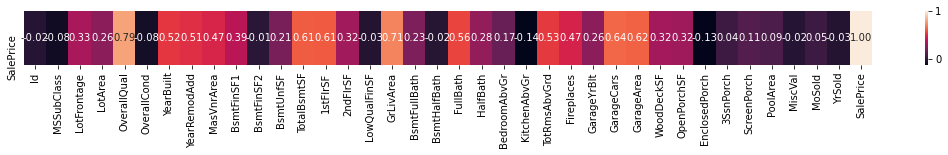

In [64]:
num = df.select_dtypes(exclude = 'object')
numcorr = num.corr()
f, ax = plt.subplots(figsize = (19,1)) # set figure size
sns.heatmap(numcorr.sort_values(by = 'SalePrice', ascending = False).head(1), annot = True, fmt = ".2f")
plt.show()

In [65]:
#Q2
df['SalePrice'].unique()
#plt.figure(figsize=(15,10))
#sns.countplot(x= 'booking_changes',data=df3)
tempdata1 = df.groupby(['OverallQual'])["OverallQual"].agg(['count']).reset_index()
tempdata1

,OverallQual,count
0,1,2
1,2,3
2,3,20
3,4,116
4,5,397
5,6,374
6,7,319
7,8,168
8,9,43
9,10,18


In [179]:
df1 = df.groupby('GrLivArea')['OverallQual'].sum()

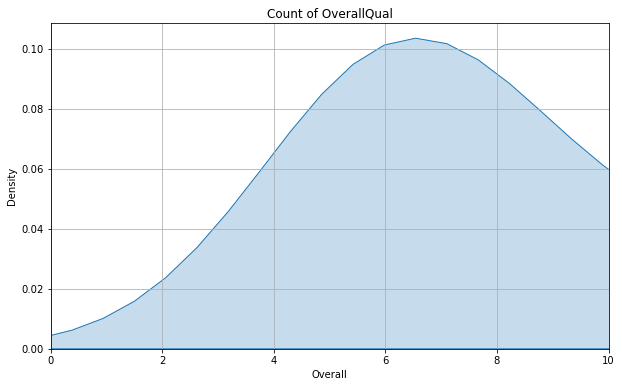

In [182]:
plt.figure(figsize=(10,6))
sns.kdeplot(df1, shade=True)
plt.xlim((0,10))
plt.title("Count of OverallQual")
plt.ylabel("Density")
plt.xlabel('Overall')
plt.grid(True)
plt.show()

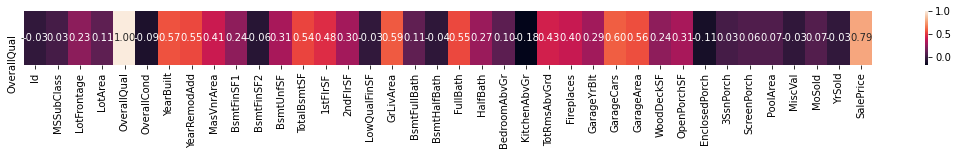

In [66]:
num = df.select_dtypes(exclude = 'object')
numcorr = num.corr()
f, ax = plt.subplots(figsize = (19,1)) # set figure size
sns.heatmap(numcorr.sort_values(by = 'OverallQual', ascending = False).head(1), annot = True, fmt = ".2f")
plt.show()

In [153]:
#q3
df['OverallQual'].unique()
tempdata2 = df.groupby(['GrLivArea','OverallQual'])["OverallQual"].agg(['count']).reset_index()
tempdata2

,GrLivArea,OverallQual,count
0,334,1,1
1,438,2,1
2,480,2,1
3,520,4,1
4,605,4,1
5,616,5,1
6,630,4,5
7,630,5,1
8,672,4,1
9,672,5,1


In [164]:
df2 = df.groupby('GrLivArea')['OverallQual'].sum()
#barplot-X axis is only needed to use this plot.


In [166]:
plt.figure(figsize=(10,6))
ax = sns.barplot(x="GrLivArea",y="OverallQual", data=df2,estimator=sum,ci = None)
plt.xlabel("GrLivArea", fontsize = 15)
plt.ylabel("OverallQual", fontsize = 15)

ValueError: Could not interpret input 'GrLivArea'

<Figure size 720x432 with 0 Axes>

In [154]:
df['OverallQual'].unique()
tempdata2 = df.groupby(['GarageCars','OverallQual'])["OverallQual"].agg(['count']).reset_index()

tempdata2

,GarageCars,OverallQual,count
0,0,1,2
1,0,2,1
2,0,3,6
3,0,4,26
4,0,5,32
5,0,6,12
6,0,7,1
7,0,8,1
8,1,2,2
9,1,3,6


In [69]:
df['OverallQual'].unique()
tempdata2 = df.groupby(['GarageCars','OverallQual'])["OverallQual"].agg(['count']).reset_index()
tempdata2

,GarageCars,OverallQual,count
0,0,1,2
1,0,2,1
2,0,3,6
3,0,4,26
4,0,5,32
5,0,6,12
6,0,7,1
7,0,8,1
8,1,2,2
9,1,3,6


In [165]:
df3=df.groupby('GarageCars')['OverallQual'].sum()

In [167]:
plt.figure(figsize=(10,6))
ax = sns.barplot(x="GrLivArea",y="OverallQual", data=df3,estimator=sum,ci = None)
plt.xlabel("GrLivArea", fontsize = 15)
plt.ylabel("OverallQual", fontsize = 15)

ValueError: Could not interpret input 'GrLivArea'

<Figure size 720x432 with 0 Axes>

In [70]:
x_trained=df.copy()
x_trained.drop(['OverallQual'],axis=1,inplace=True)
y_trained = df['SalePrice']


# Feature engineering

## Convert Data

In [71]:
x=x_trained.iloc[:,:].values

In [72]:
type(x)

numpy.ndarray

In [73]:
x.shape

(1460, 37)

## Coding hot endcoding 

In [74]:
x[0]

array([1.000e+00, 6.000e+01, 6.500e+01, 8.450e+03, 5.000e+00, 2.003e+03,
       2.003e+03, 1.960e+02, 7.060e+02, 0.000e+00, 1.500e+02, 8.560e+02,
       8.560e+02, 8.540e+02, 0.000e+00, 1.710e+03, 1.000e+00, 0.000e+00,
       2.000e+00, 1.000e+00, 3.000e+00, 1.000e+00, 8.000e+00, 0.000e+00,
       2.003e+03, 2.000e+00, 5.480e+02, 0.000e+00, 6.100e+01, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 2.008e+03,
       2.085e+05])

In [75]:
x[:,0]

array([1.000e+00, 2.000e+00, 3.000e+00, ..., 1.458e+03, 1.459e+03,
       1.460e+03])

In [76]:
x[0]

array([1.000e+00, 6.000e+01, 6.500e+01, 8.450e+03, 5.000e+00, 2.003e+03,
       2.003e+03, 1.960e+02, 7.060e+02, 0.000e+00, 1.500e+02, 8.560e+02,
       8.560e+02, 8.540e+02, 0.000e+00, 1.710e+03, 1.000e+00, 0.000e+00,
       2.000e+00, 1.000e+00, 3.000e+00, 1.000e+00, 8.000e+00, 0.000e+00,
       2.003e+03, 2.000e+00, 5.480e+02, 0.000e+00, 6.100e+01, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 2.008e+03,
       2.085e+05])

In [77]:
dummy1=pd.get_dummies(x[:,0])
dummy1=np.asarray(dummy1)
x=np.concatenate((x,dummy1),axis=1)
x=np.delete(x,0,1)

In [78]:
x[:,2]

array([ 8450.,  9600., 11250., ...,  9042.,  9717.,  9937.])

In [79]:
np.random.seed(0)
number_of_simples=len(x)
random_indices=np.random.permutation(number_of_simples)
num_training_samples=int(number_of_simples*0.75)
x_trains=x[random_indices[:num_training_samples]]
y_trains=y_trained[random_indices[:num_training_samples]]
x_validation=x[random_indices[num_training_samples:]]
y_validation=y_trained[random_indices[num_training_samples:]]


In [80]:

scaler = StandardScaler()


scaler.fit(x_trains)

 
x_trains = scaler.transform(x_trains)
x_validationq = scaler.transform(x_validation)

# Univariate Analysis

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

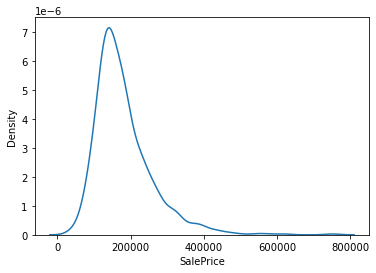

In [81]:
#Sales Price
sns.kdeplot(df['SalePrice'])

<AxesSubplot:xlabel='OverallQual', ylabel='Density'>

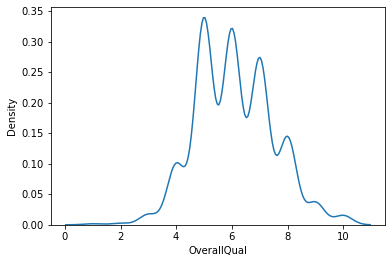

In [82]:
#OverallQual
sns.kdeplot(df['OverallQual'])

<AxesSubplot:xlabel='GarageCars', ylabel='Density'>

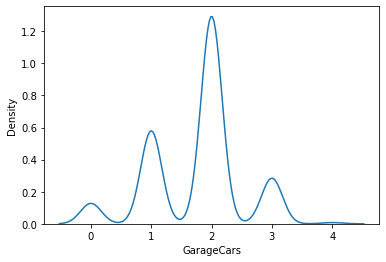

In [187]:
#OverallQual
sns.kdeplot(df['GarageCars'])

# Bivariate Analysis

In [83]:
plt.figure(figsize=(14, 14))

sns.pairplot(df, diag_kind='kde');

KeyboardInterrupt: 

<Figure size 1008x1008 with 0 Axes>

Error in callback <function flush_figures at 0x7fe2fbea6d30> (for post_execute):


KeyboardInterrupt: 

In [ ]:
#getting correllation matrix
corr_mat=x_trained.corr(method='pearson')
plt.figure(figsize=(30,20))
sns.heatmap(corr_mat,vmax=1,square=True,annot=True,cmap='cubehelix')

# Multivariate analysis

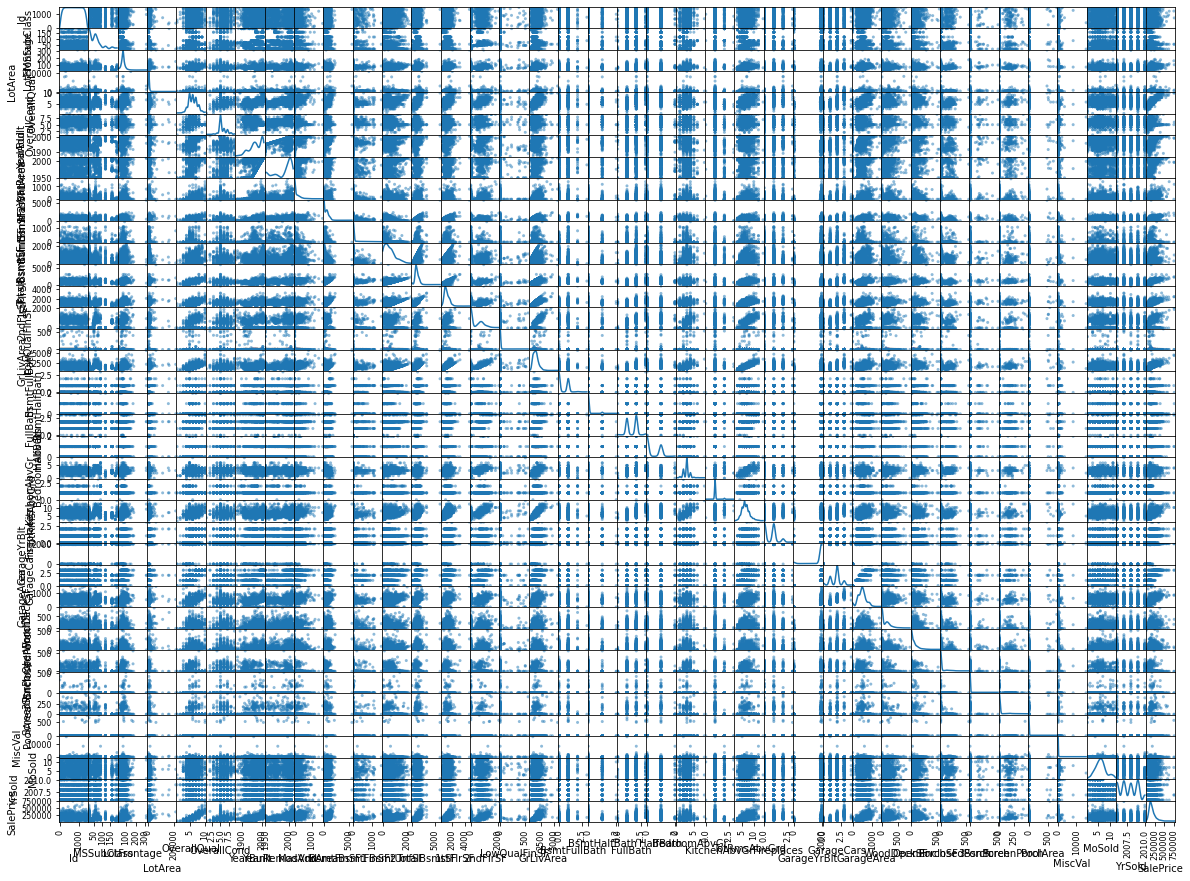

In [186]:
pd.plotting.scatter_matrix(df.loc[:, :], diagonal="kde",figsize=(20,15))
plt.show()

# Linear regression

In [108]:

pca=PCA(.70)

model = LinearRegression().fit(x_validation, y_validation)

r_sq = model.score(x_validation, y_validation)
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_)



coefficient of determination: 1.0
intercept: 182949.8961441948
slope: [-65.41330363 114.42976595  22.61553497 ... -44.89074354  49.37981789
 -72.94745825]


In [109]:
y_pred = model.predict(x_validation)
print('predicted response:', y_pred, sep='\n')
print('slope:', new_model.coef_)

predicted response:
[170000. 270000. 209500. 222000.  55000. 177000. 136500. 134000. 235000.
 266000. 305900. 232000. 261500. 149000. 228500. 119000. 257000. 145000.
 245500. 250000. 147000. 178000. 203000. 240000. 294000. 140000. 140000.
 186700. 124900. 103200. 377426. 124900. 140000. 260000. 112000. 120000.
 127000. 424870. 119000. 154000. 119000. 139000. 133000. 177000. 224000.
 163500. 130000. 214000. 154000. 158000. 105000. 188700. 156932. 135000.
 170000. 155000. 319000. 122900. 212000. 200000. 185000. 320000. 222500.
 165000. 237000. 119900.  80000. 287000. 235000. 175500. 133000. 222500.
 162500. 205000.  96500. 130000. 250000. 133900.  80500. 135000. 152000.
 152000. 100000. 155000. 105500. 125000.  78000. 326000. 130000. 110000.
 133900. 106000. 181000. 274725. 130250. 189950. 137000. 135000.  52000.
 142000. 124000. 264132. 328900. 141000. 377500. 225000.  96500. 124500.
 202900. 200000. 105000. 144500. 196000. 582933. 161000. 104900. 211000.
 118000. 183500. 128900. 155000

In [112]:
y_pred = model.intercept_ + model.coef_ * x_validation
>>> print('predicted response:', y_pred, sep='\n')

predicted response:
[[183008.49691491 183113.00325618 182966.22710022 ... 182951.25335759
  182948.40320946 182952.10161596]
 [183008.49691491 183026.22284796 182958.69368908 ... 182951.25335759
  182948.40320946 182952.10161596]
 [182852.95735865 182765.88162333 182936.55204984 ... 182951.25335759
  182948.40320946 182952.10161596]
 ...
 [182899.61922553 182939.44243975 182946.21369415 ... 182951.25335759
  182948.40320946 182952.10161596]
 [182852.95735865 182949.90692352 182933.44874749 ... 182951.25335759
  182948.40320946 182952.10161596]
 [182946.28109241 182888.39514081 182963.6669871  ... 182951.25335759
  182948.40320946 182952.10161596]]


ValueError: x and y must be the same size

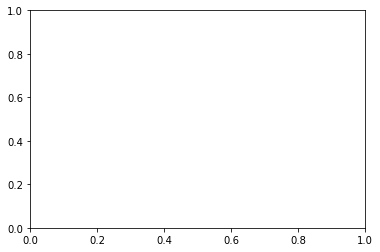

In [124]:
plt.scatter(x_validation,y_validation)
plt.show

# Random Forest Regression



In [136]:



params = {
    'n_estimators': [100, 500, 1000],
    'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
    'min_samples_leaf': [1,2,4],
    'min_samples_split': [2,5,10]
}

rf_random = RandomizedSearchCV(estimator = RandomForestRegressor(), param_distributions = params, n_iter = 100, cv = 3, verbose =2, random_state = 42, n_jobs = -1)
rf_random.fit(x_trains, y_trains)
rf_random.best_params_


Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 14.7min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 29.7min finished


{'n_estimators': 500,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_depth': 50}

In [148]:


regressor = RandomForestRegressor(rf_random.best_params_)
regressor.fit(x_trains, y_trains)
y1_rfo = list(regressor.predict(x_trains))
y2_rfo = list(regressor.predict(x_validation))

print_error_message(y_trains, y1_rfo, "Train", "Random Forest Regression")
print_error_message(y_validation, y2_rfo, "Validate", "Random Forest Regression")



ValueError: n_estimators must be an integer, got <class 'dict'>.

# Ridge Regression



In [151]:
from sklearn.linear_model import Ridge

params = { 'alpha': [i for i in range(1, 101)] }

ridge_reg = GridSearchCV(Ridge(), param_grid = params,
                        scoring = 'neg_mean_squared_error',
                        cv = 5)

ridge_reg.fit(x_trains, y_trains)
ridge_ytrain = ridge_reg.predict(x_trains)
ridge_yhat = ridge_reg.predict(x_validation)

print(f'r2_square on validation set: {r2_score(y_validations, ridge_yhat)}')
print(f'The best value of Alpha is: {ridge_reg.best_params_}')
print_error_message(y_trains, ridge_ytrain, "Train", "Ridge Regression")
print_error_message(y_validation, ridge_yhat, "Validate", "Ridge Regression")



NameError: name 'r2_score' is not defined

# Error Calculation

In [ ]:



def print_error_message(y_actual, y_predicted, data_prefix, model_name):
    error = 0
    for i in range(len(y_actual)):
        error += (abs(y_predicted[i]-y_actual[i])/y_actual[i])
    error_percent = error/len(y_actual) * 100
    print(f'{data_prefix} error = {round(error_percent, 2)}% in {model_name}')


